In [316]:
# Вариант == 6, 2, 5
# Вид закона распределения == 6 (Нормальное)
# Число признаков == 2
# Число классов == 5

In [317]:
# 1.	Биномиальное
# 3 – число признаков
# 3 – число кластеров
# 1- метод к - среднего
# 2 - метод деревьев решений
# 1- эвклидово расстояние

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
from numpy.random import seed
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import math

In [319]:
c1 = np.random.normal(100, 0.5, (2, 300))
c2 = np.random.normal(100, 0.5, (2, 300)) + 25
c3 = np.random.normal(100, 0.5, (2, 300)) + 50
c4 = np.random.normal(100, 0.5, (2, 300)) + 75
c5 = np.random.normal(100, 0.5, (2, 300)) + 100

In [320]:
xs = np.concatenate((c1[0], c2[0],c3[0], c4[0], c5[0]))
ys = np.concatenate((c1[1], c2[1],c3[1], c4[1], c5[1]))
#zs = np.concatenate((c1[2], c2[2],c3[2], c4[2], c5[2]))


In [321]:
xsyszs = [[xs[i], ys[i]] for i in range(len(xs))]

In [322]:
Y = [[] for i in range(1500)]
for i in range(0, 300):
  Y[i] = 0
for i in range(300, 600):
  Y[i] = 1
for i in range(600, 900):
  Y[i] = 2
for i in range(900, 1200):
  Y[i] = 3
for i in range(1200, 1500):
  Y[i] = 4
#Y = np.array(Y)
#Y = Y.reshape((1500,1))

In [323]:
xsyszs=np.array(xsyszs)
xsyszs= xsyszs.reshape((1500,2))

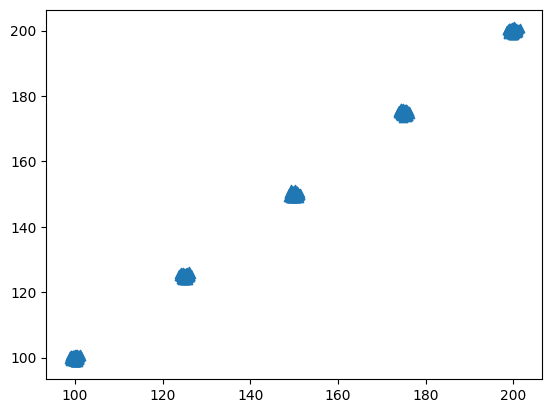

In [324]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xsyszs[:,0] , xsyszs[:,1], marker='^')

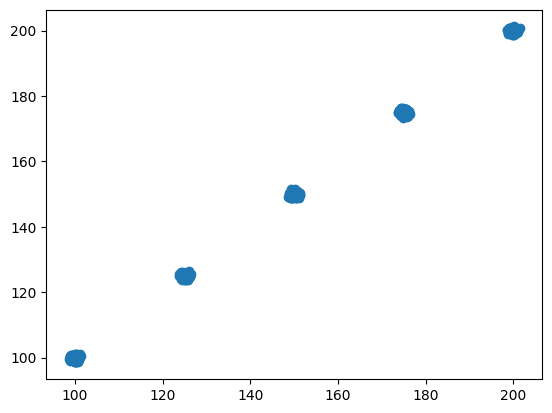

In [325]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xsyszs[:,0] , xsyszs[:,1] , marker='o') #, c=Y

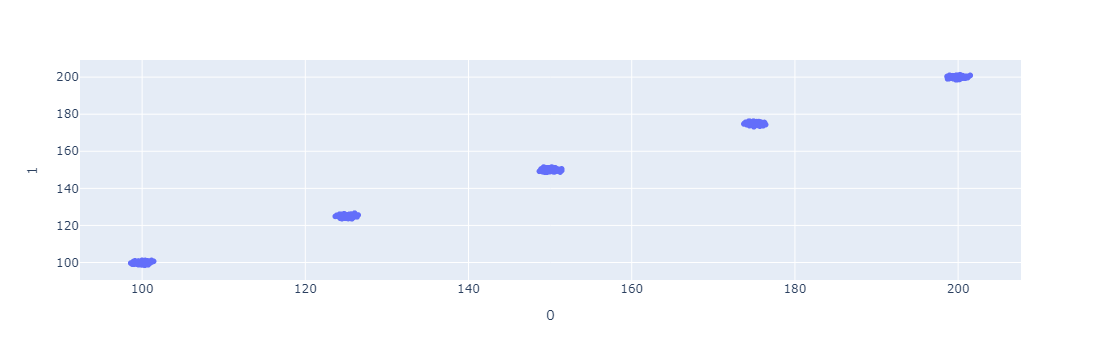

In [326]:
res_df = pd.DataFrame(xsyszs)
fig = px.scatter(res_df, x=0, y=1)
fig.show()

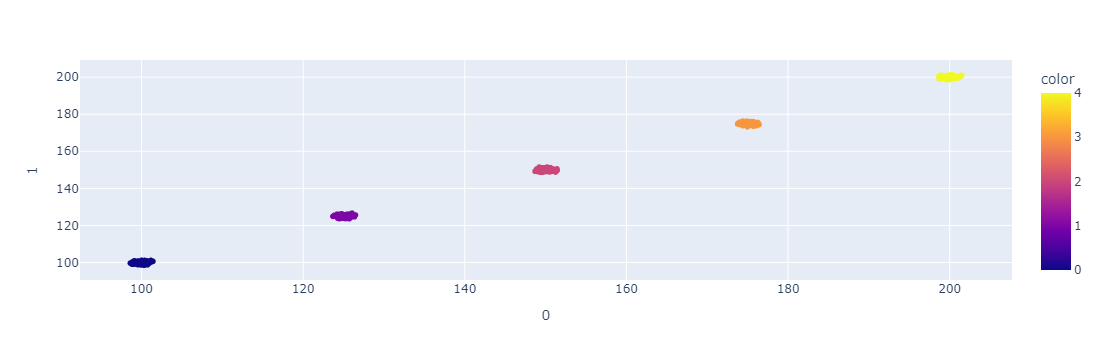

In [327]:
fig = px.scatter(res_df, x=0, y=1,color=Y) 
fig.show()

In [328]:
sc = MinMaxScaler()
xsyszs_n =pd.DataFrame(sc.fit_transform(res_df))
xsyszs_n.describe()

,0,1
count,1500.000000,1500.000000
mean,0.499521,0.500879
std,0.343940,0.344206
min,0.000000,0.000000
25%,0.253254,0.254080
50%,0.500062,0.500584
75%,0.746704,0.746976
max,1.000000,1.000000


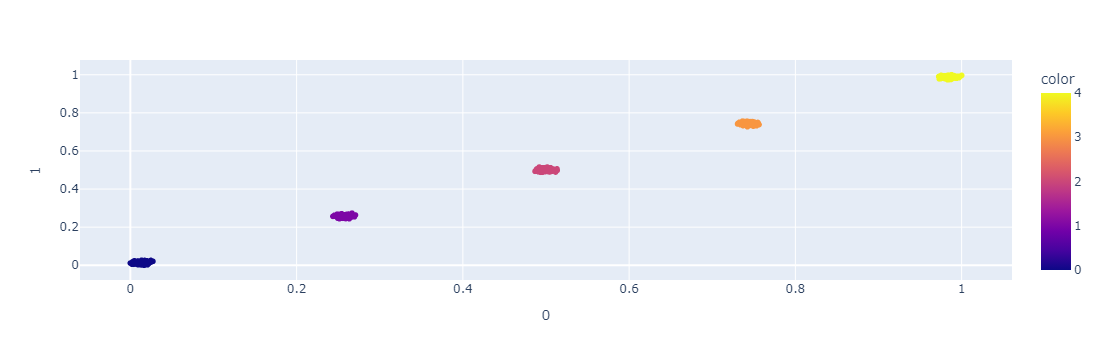

In [329]:
fig = px.scatter(xsyszs_n, x=0, y=1, color=Y)
fig.show()

In [330]:
print(len(xsyszs_n))
print(len(Y))
X_train, X_test, y_train, y_test = train_test_split(xsyszs_n, Y, test_size=0.33, random_state=42)

1500
1500


**Осуществим кластеризацию методом k-средних**

In [331]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [332]:
df_cluster_centers=pd.DataFrame(kmeans.cluster_centers_)
print(df_cluster_centers)

          0         1
0  0.869165  0.870758
1  0.012931  0.014406
2  0.382817  0.383662


In [333]:
print(confusion_matrix(y_train,kmeans.labels_))

[[  0 208   0   0   0]
 [  0   0 197   0   0]
 [  0   0 212   0   0]
 [186   0   0   0   0]
 [202   0   0   0   0]]


In [334]:
print(confusion_matrix(y_test,kmeans.predict(X_test)))

[[  0  92   0   0   0]
 [  0   0 103   0   0]
 [  0   0  88   0   0]
 [114   0   0   0   0]
 [ 98   0   0   0   0]]


In [335]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\morgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\pylab.py:166: UserWarning:

pylab import has clobbered these variables: ['step', 'random', 'Normalize']
`%matplotlib` prevents importing * from pylab and numpy



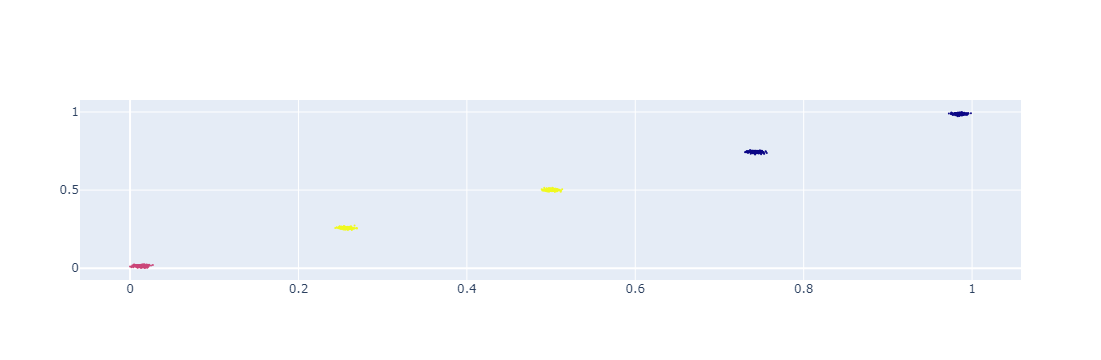

In [336]:
fig = go.Figure(data=[
go.Scatter(
    x=X_train[0], y=X_train[1], mode='markers', marker=dict(size=2, color=kmeans.labels_)
),

go.Scatter3d(
  x=df_cluster_centers[0],
  y=df_cluster_centers[1],
  mode='markers',
  marker=dict(size=4,color='red')
)
]
)
fig.show()

# PNN

In [337]:
# Probabilistic Neural Network with 4 layers
class PNN(object):
    def __init__(self):
        self.L2 = []    # Layer 2 that holds the patterns
        print('Empty PNN created.')

    def train(self, X, y, p=2):
        self.n_ = X.shape[1]  # num of features
        self.p_ = p           # num of classes
        
        # Layer 2 (Pattern): Set up empty lists for each class
        for k in range(self.p_):
            self.L2.append([])    # Using Python's basic lists because ndarray cannot append empty arrays
                                  # Also perhaps we might have to input different data types

        # Enter patterns into Layer 2
        for i in range(X.shape[0]):
            self.L2[y[i]].append(X[i])
        
        #self.L2 = np.array(self.L2)    # Change to ndarray for speed (Is this faster?)

        print('PNN with %d classes trained.' % self.p_)

    def crossValidate(self, X, y, sigma=0.5):
        result = self.predict(X, sigma)
        num_correct = sum(result[:, 0] == y)

        print('Cross validation accuracy with sigma %.2f: %.1f%%' % (sigma, num_correct/len(y) * 100))

    def predict(self, X, sigma=0.5):
        m = X.shape[0]
        accL3 = np.zeros((m, self.p_))
        accL4 = np.zeros(m)

        self.sigma_ = sigma    # smoothing parameter, not standard deviation
        self.C1_ = 2 * self.sigma_**2
        C2_ = (math.sqrt(2*math.pi) * self.sigma_) ** (- self.n_)
        
        # Layer 1 (Input): x
        for i in range(m):
            x = X[i]

            # Layer 3 (Averaging): for each class
            self.L3_ = np.zeros(self.p_)
            for k in range(self.p_):
                for ki in range(len(self.L2[k])):
                    self.L3_[k] += self._activation(x, self.L2[k][ki])
                self.L3_[k] /= len(self.L2[k])
                
                # Multiply constant
                self.L3_[k] *= C2_
                accL3[i][k] = self.L3_[k]

            # Layer 4 (Output/Decision): Maxing
            self.L4_ = self.L3_.argmax()
            accL4[i] = self.L4_

        return np.column_stack((accL4, accL3))

    def _activation(self, x, w):
        diff = x - w
        return math.exp( - np.dot(diff, diff) / self.C1_ )


# Normalize to unit length: [0, 1]
# X must be ndarray
def Normalize(X):
    x_max = X.max(axis=0)
    x_min = X.min(axis=0)
    return (X - x_min) / (x_max - x_min)

In [338]:
# Elif internet connection:
df = pd.read_csv('data.csv', header=None)
df.tail()
#print(df)

X = df.iloc[:, :192].values
#print(X)

y = df[451].values
# Преобразуем массив в список
y_list = y.tolist()
X_list = X.tolist()
#print(X_list)
# Удаляем первое вхождение значения
y_list.remove("class")
X_list.remove(X_list[0])
#print(X_list)
y = np.array(y_list)
X = np.array(X_list)
for i in range(len(y)):
    if y[i] == "P":
        y[i] = int(0)
    else:
        y[i] = int(1)
for i in range(len(X)):
    X[i][0] = i

In [339]:
X_N = Normalize(X.astype(float))

# Training data
X_tr = np.vstack((X_N[0:40], X_N[50:90], X_N[100:140]))
y_tr = np.append(np.append(y[0:40], y[50:90]), y[100:140])
y_tr = y_tr.astype(int)
# Cross validation data (may be same as training data for a PNN)
X_cv = X_tr
y_cv = y_tr
print(len(X_cv))
print(len(X_N))
print(len(X_cv))
print(len(y_cv))

# Test data
X_tt = np.vstack((X_N[40:50], X_N[90:100], X_N[140:150]))
y_tt = np.append(np.append(y[40:50], y[90:100]), y[140:150])

120
174
120
120


In [340]:
pnn = PNN()

Empty PNN created.


In [341]:
pnn.train(X_tr, y_tr, p=2)

PNN with 2 classes trained.


In [342]:
begin = 0.01
end   = 0.20
step  = 0.01

s = begin
while s < end+step:
    pnn.crossValidate(X_cv, y_cv, sigma=s)
    s += step

Cross validation accuracy with sigma 0.01: 100.0%
Cross validation accuracy with sigma 0.02: 100.0%
Cross validation accuracy with sigma 0.03: 100.0%
Cross validation accuracy with sigma 0.04: 100.0%
Cross validation accuracy with sigma 0.05: 100.0%
Cross validation accuracy with sigma 0.06: 100.0%
Cross validation accuracy with sigma 0.07: 100.0%
Cross validation accuracy with sigma 0.08: 100.0%
Cross validation accuracy with sigma 0.09: 100.0%
Cross validation accuracy with sigma 0.10: 100.0%
Cross validation accuracy with sigma 0.11: 100.0%
Cross validation accuracy with sigma 0.12: 100.0%
Cross validation accuracy with sigma 0.13: 100.0%
Cross validation accuracy with sigma 0.14: 100.0%
Cross validation accuracy with sigma 0.15: 100.0%
Cross validation accuracy with sigma 0.16: 100.0%
Cross validation accuracy with sigma 0.17: 100.0%
Cross validation accuracy with sigma 0.18: 100.0%
Cross validation accuracy with sigma 0.19: 100.0%
Cross validation accuracy with sigma 0.20: 100.0%


In [343]:
result = pnn.predict(X_tt, sigma=0.04)
print(result)

[[0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 3.56214213e-066]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 2.20417448e-120]
 [0.00000000e+000 0.00000000e+0

In [344]:
random_state = None
seed(random_state)
r = np.random.permutation(len(y))
X_N2, y2 = X_N[r], y[r]

# Training data
X_tr2 = X_N2[:120]
X_tr2 = X_tr2.astype(double)
y_tr2 = y2[:120]
y_tr2 = y_tr2.astype(int)

# Cross validation data (may be same as training data for a PNN)
X_cv2 = X_tr2
y_cv2 = y_tr2

# Test data
X_tt2 = X_tt
y_tt2 = y_tt

pnn2 = PNN()
pnn2.train(X_tr2, y_tr2.astype(int), p=2)

Empty PNN created.
PNN with 2 classes trained.


In [345]:
begin = 0.01
end   = 0.20
step  = 0.01

s = begin
while s < end+step:
    pnn2.crossValidate(X_cv2, y_cv2, sigma=s)
    s += step

Cross validation accuracy with sigma 0.01: 100.0%
Cross validation accuracy with sigma 0.02: 100.0%
Cross validation accuracy with sigma 0.03: 100.0%
Cross validation accuracy with sigma 0.04: 100.0%
Cross validation accuracy with sigma 0.05: 100.0%
Cross validation accuracy with sigma 0.06: 100.0%
Cross validation accuracy with sigma 0.07: 100.0%
Cross validation accuracy with sigma 0.08: 100.0%
Cross validation accuracy with sigma 0.09: 100.0%
Cross validation accuracy with sigma 0.10: 100.0%
Cross validation accuracy with sigma 0.11: 100.0%
Cross validation accuracy with sigma 0.12: 100.0%
Cross validation accuracy with sigma 0.13: 100.0%
Cross validation accuracy with sigma 0.14: 100.0%
Cross validation accuracy with sigma 0.15: 100.0%
Cross validation accuracy with sigma 0.16: 100.0%
Cross validation accuracy with sigma 0.17: 100.0%
Cross validation accuracy with sigma 0.18: 100.0%
Cross validation accuracy with sigma 0.19: 100.0%
Cross validation accuracy with sigma 0.20: 100.0%


In [346]:
result2 = pnn2.predict(X_tt2, sigma=0.04)
print(result2)

[[0.00000000e+000 1.00245077e+190 0.00000000e+000]
 [0.00000000e+000 1.00245077e+190 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00245077e+190 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00245077e+190 0.00000000e+000]
 [0.00000000e+000 1.00245077e+190 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 1.00245077e+190]
 [1.00000000e+000 0.00000000e+000 1.00245077e+190]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 1.00245077e+190]
 [1.00000000e+000 0.00000000e+000 1.00245077e+190]
 [1.00000000e+000 0.00000000e+000 1.00245077e+190]
 [1.00000000e+000 0.00000000e+000 1.00245077e+190]
 [1.00000000e+000 0.00000000e+000 1.00245077e+190]
 [1.00000000e+000 0.00000000e+0

## Perceptron

In [347]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.aclivation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.aclivation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.aclivation_func(linear_output)
        return y_predicted
#функция активации (если результат сумматора >= 0, то результат = 1)
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [348]:
net = Perceptron(n_iters=10)
net.fit(np.array(X_train).reshape(-1,2), y_train)
print("Матрица весов = ", net.weights)
print("Смещение = ", net.bias)
print(confusion_matrix(y_train, net.predict(X_train)))
print(confusion_matrix(y_test, net.predict(X_test)))

Матрица весов =  [0.02170657 0.02159086]
Смещение =  -0.01
[[208   0   0   0   0]
 [  0 197   0   0   0]
 [  0 212   0   0   0]
 [  0 186   0   0   0]
 [  0 202   0   0   0]]
[[ 92   0   0   0   0]
 [  0 103   0   0   0]
 [  0  88   0   0   0]
 [  0 114   0   0   0]
 [  0  98   0   0   0]]


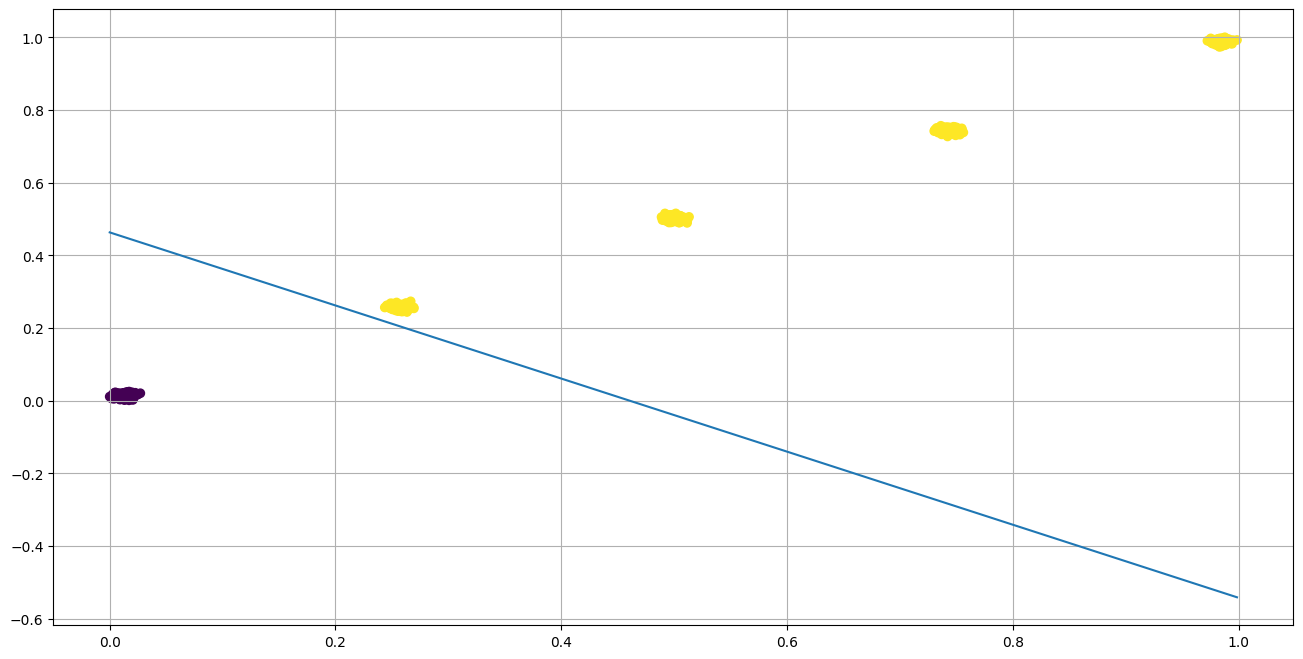

In [349]:
prY_Train = net.predict(X_train)
#print(y_train)
npArrX_train = np.array(X_train).reshape(-1, 2)
#print(npArrX_train)
plt.figure(figsize=(16,8))
plt.scatter(npArrX_train[:,0], npArrX_train[:,1], marker='o', linewidths=1, c= prY_Train)
plt.grid()

#построение разделяющей прямой по весам и смещениям
x0_1 = np.amin(npArrX_train[:,0])
x0_2 = np.amax(npArrX_train[:,0])

x1_1 = (-net.weights[0] * x0_1 - net.bias) / net.weights[1]
x1_2 = (-net.weights[0] * x0_2 - net.bias) /net.weights[1]

#добавление прямой на график
plt.plot([x0_1, x0_2], [x1_1, x1_2])

In [350]:
r = confusion_matrix(y_train, prY_Train)
print(r)

[[208   0   0   0   0]
 [  0 197   0   0   0]
 [  0 212   0   0   0]
 [  0 186   0   0   0]
 [  0 202   0   0   0]]


In [351]:
indexes = []
y_trainP = y_train
for i in range(len(y_trainP)):
    if (y_trainP[i] == 0):
        indexes.append(i)
X_train2 = np.delete(X_train, indexes)
y_trainP = np.delete(y_train, indexes)

net = Perceptron(n_iters=10)
net.fit(np.array(X_train2).reshape(-1,2), y_trainP)

prY_Train = net.predict(X_train2)
#print(y_train)
npArrX_train = np.array(X_train).reshape(-1, 2)
#print(npArrX_train)
plt.figure(figsize=(16,8))
plt.scatter(npArrX_train[:,0], npArrX_train[:,1], marker='o', linewidths=1, c= prY_Train)
plt.grid()

#построение разделяющей прямой по весам и смещениям
x0_1 = np.amin(npArrX_train[:,0])
x0_2 = np.amax(npArrX_train[:,0])

x1_1 = (-net.weights[0] * x0_1 - net.bias) / net.weights[1]
x1_2 = (-net.weights[0] * x0_2 - net.bias) /net.weights[1]

#добавление прямой на график
plt.plot([x0_1, x0_2], [x1_1, x1_2])

IndexError: index 797 is out of bounds for axis 0 with size 797

## MLP

In [352]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [353]:
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [354]:
seed(1)
network = initialize_network(3, 1, 5)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217]}]
[{'weights': [0.49543508709194095, 0.4494910647887381]}, {'weights': [0.651592972722763, 0.7887233511355132]}, {'weights': [0.0938595867742349, 0.02834747652200631]}, {'weights': [0.8357651039198697, 0.43276706790505337]}, {'weights': [0.762280082457942, 0.0021060533511106927]}]


In [355]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

In [356]:
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

In [357]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [358]:
# test forward propagation
row = [1, 0, 0.45, None]
output = forward_propagate(network, row)
print(output)

[np.float64(0.6865746146234505), np.float64(0.7736206131403554), np.float64(0.5229211461886505), np.float64(0.7305313013692126), np.float64(0.6264507426080236)]


In [359]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

In [360]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [361]:
expected = [0, 0, 0, 0, 1]
backward_propagate_error(network, expected)
for layer in network:
 print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217], 'output': np.float64(0.675492158547748), 'delta': np.float64(0.04982029388652509)}]
[{'weights': [0.49543508709194095, 0.4494910647887381], 'output': np.float64(0.6865746146234505), 'delta': np.float64(0.14774393171111527)}, {'weights': [0.651592972722763, 0.7887233511355132], 'output': np.float64(0.7736206131403554), 'delta': np.float64(0.1354855396015997)}, {'weights': [0.0938595867742349, 0.02834747652200631], 'output': np.float64(0.5229211461886505), 'delta': np.float64(0.13045555478831408)}, {'weights': [0.8357651039198697, 0.43276706790505337], 'output': np.float64(0.7305313013692126), 'delta': np.float64(0.14380897243555138)}, {'weights': [0.762280082457942, 0.0021060533511106927], 'output': np.float64(0.6264507426080236), 'delta': np.float64(-0.08741434005328932)}]


In [362]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

In [363]:
# Train a network for a fixed number of epochs
list_errors = []
def train_network(network, train, l_rate, n_epoch, n_outputs):
	list_errors = []
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
		list_errors.append(sum_error)
	return list_errors
print(X_test)

             0         1
1116  0.747030  0.744239
1368  0.977305  0.994229
422   0.254300  0.255644
413   0.254260  0.257801
451   0.253044  0.248638
...        ...       ...
352   0.255511  0.258667
937   0.746666  0.736141
1295  0.985089  0.983929
1392  0.983681  0.985800
1300  0.992290  0.991799

[495 rows x 2 columns]


In [364]:
def predict(network, row):
 outputs = forward_propagate(network, row)
 return outputs.index(max(outputs))

In [365]:
# Test training backprop algorithm
seed(1)
# X_train, X_test, y_train, y_test
# dataset = [[2.7810836,2.550537003,0],
# [1.465489372,2.362125076,0],
# [3.396561688,4.400293529,0],
# [1.38807019,1.850220317,0],
# [3.06407232,3.005305973,0],
# [7.627531214,2.759262235,1],
# [5.332441248,2.088626775,1],
# [6.922596716,1.77106367,1],
# [8.675418651,-0.242068655,1],
# [7.673756466,3.508563011,1]]
train_data1 = np.column_stack((X_test, y_test)).tolist()

for i in range(len(train_data1)):
    for j in range(0, 3):
        if j == 2:
            train_data1[i][j] = int(train_data1[i][j])

dataset1 = train_data1

train_data = np.column_stack((X_train, y_train)).tolist()


for i in range(len(train_data)):
    for j in range(0, 3):
        if j == 2:
            train_data[i][j] = int(train_data[i][j])
# Вывод результата
dataset = train_data
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
errorsInTest = []
list_errors1 = []
y_true = []
y_pred = []
for i in range(0, 10):
    network = initialize_network(n_inputs, 3, n_outputs)
    list_errors1 = train_network(network, dataset, 0.5, i, n_outputs)
    error = 0
    for row in dataset1:
        prediction = predict(network, row)
        if (row[-1] != prediction):
            error += 1
        y_true.append(row[-1])
        y_pred.append(prediction)
        #print('Expected=%d, Got=%d' % (row[-1], prediction))
    errorsInTest.append(error)
# list_errors2 = train_network(network, dataset1, 0.5, 20, n_outputs)
errorsInTest.pop(-1)
print(errorsInTest)
for layer in network:
 print(layer)

>epoch=0, lrate=0.500, error=750.268
>epoch=0, lrate=0.500, error=795.236
>epoch=1, lrate=0.500, error=593.440
>epoch=0, lrate=0.500, error=792.320
>epoch=1, lrate=0.500, error=585.887
>epoch=2, lrate=0.500, error=527.578
>epoch=0, lrate=0.500, error=765.308
>epoch=1, lrate=0.500, error=566.256
>epoch=2, lrate=0.500, error=464.974
>epoch=3, lrate=0.500, error=369.246
>epoch=0, lrate=0.500, error=706.290
>epoch=1, lrate=0.500, error=547.671
>epoch=2, lrate=0.500, error=515.310
>epoch=3, lrate=0.500, error=465.858
>epoch=4, lrate=0.500, error=374.089
>epoch=0, lrate=0.500, error=774.165
>epoch=1, lrate=0.500, error=578.409
>epoch=2, lrate=0.500, error=529.132
>epoch=3, lrate=0.500, error=480.085
>epoch=4, lrate=0.500, error=409.498
>epoch=5, lrate=0.500, error=334.130
>epoch=0, lrate=0.500, error=737.790
>epoch=1, lrate=0.500, error=554.487
>epoch=2, lrate=0.500, error=491.461
>epoch=3, lrate=0.500, error=408.791
>epoch=4, lrate=0.500, error=337.689
>epoch=5, lrate=0.500, error=280.456
>

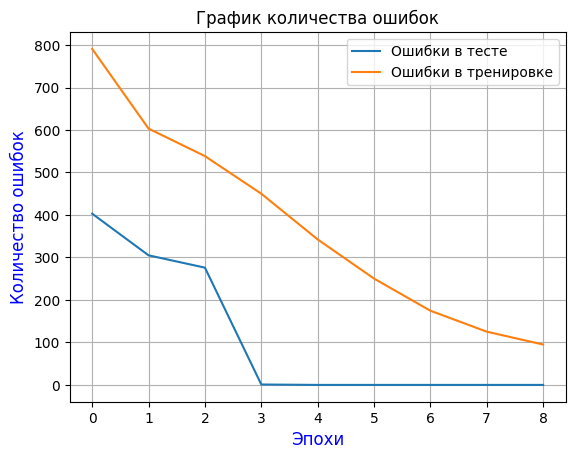

In [366]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Создание графика
plt.title('График количества ошибок')
plt.xlabel('Эпохи', fontsize=12, color='blue')
plt.ylabel('Количество ошибок', fontsize=12, color='blue')
plt.grid(True)
plt.plot(x, errorsInTest, label='Ошибки в тесте')
plt.plot(x, list_errors1, label='Ошибки в тренировке')
plt.legend()

In [367]:
confusion_matrix(y_true, y_pred)

array([[920,   0,   0,   0,   0],
       [309, 721,   0,   0,   0],
       [ 88,   0, 644, 148,   0],
       [114,   0,   0, 798, 228],
       [ 98,   0,   0,   0, 882]])